In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tqdm import tqdm
from keras.utils import np_utils
import helpers

Using TensorFlow backend.


In [2]:
def resize_img(img, resize_dim=299):
    '''
    Resize image
    
    '''
    img=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img


def get_data(path):
    '''
    Return image from given path
    '''
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img


def center_crop(image):
    resize_dim = 320
    y,x,_ = image.shape
    startx = x//2-(resize_dim//2)
    starty = y//2-(resize_dim//2)
    image = image[starty:starty+resize_dim,startx:startx+resize_dim]
    return image


def pad_image_for_square( img ):
    '''
    Pad image to retain aspect ratio
    
    Args:
        img
    Returns:
        img
    '''
    (rows, cols, dim) = img.shape
    resize_dim = max( rows, cols)
    pad_row = resize_dim - rows
    pad_col = resize_dim - cols
    img = np.pad(img, ((0,pad_row), (0, pad_col), (0,0)), 'constant', constant_values=0)
    return img



In [3]:
#Root directory of the project
ROOT_DIR = os.path.abspath(".")
# Training file directory
DATASET = os.path.join(ROOT_DIR, 'dataset')
DATASET

'/home/hasib/lesion-learnt/dataset'

In [4]:
# IMAGES PATH
IMAGES = os.path.join(DATASET, 'ISIC2016', 'ISBI2016_ISIC_Part3_Training_Data')
IMAGES

'/home/hasib/lesion-learnt/dataset/ISIC2016/ISBI2016_ISIC_Part3_Training_Data'

(768, 1024, 3)


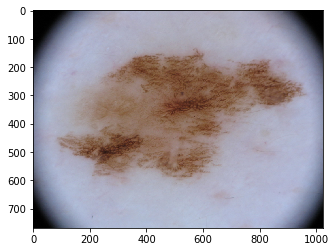

In [59]:
img = get_data("{}/{}".format(IMAGES, os.listdir(IMAGES)[105]))
print(img.shape)
plt.imshow(img)

In [60]:
def extract_patch(image):
    """Get 5 patches from an image
    
    Args: 
        image: input image
    Return: 
        patches: numpy array consisting of 5 crops from the input
        image
    """
    
    # get shape
    y, x, _ = img.shape
    # get center point
    yc, xc = y//2, x//2
    
    # upper left 
    a = img[0: yc, 0:xc]
    # lower left
    b = img[yc:, 0:xc]
    # upper right
    c = img[0:yc, xc:]
    # lower right
    d = img[yc:, xc:]
    # center crop
    e = center_crop(img)
    
    patches = np.array([a,c,b,d,e])
    return patches

In [61]:
a = extract_patch(img)
a.shape

(5,)

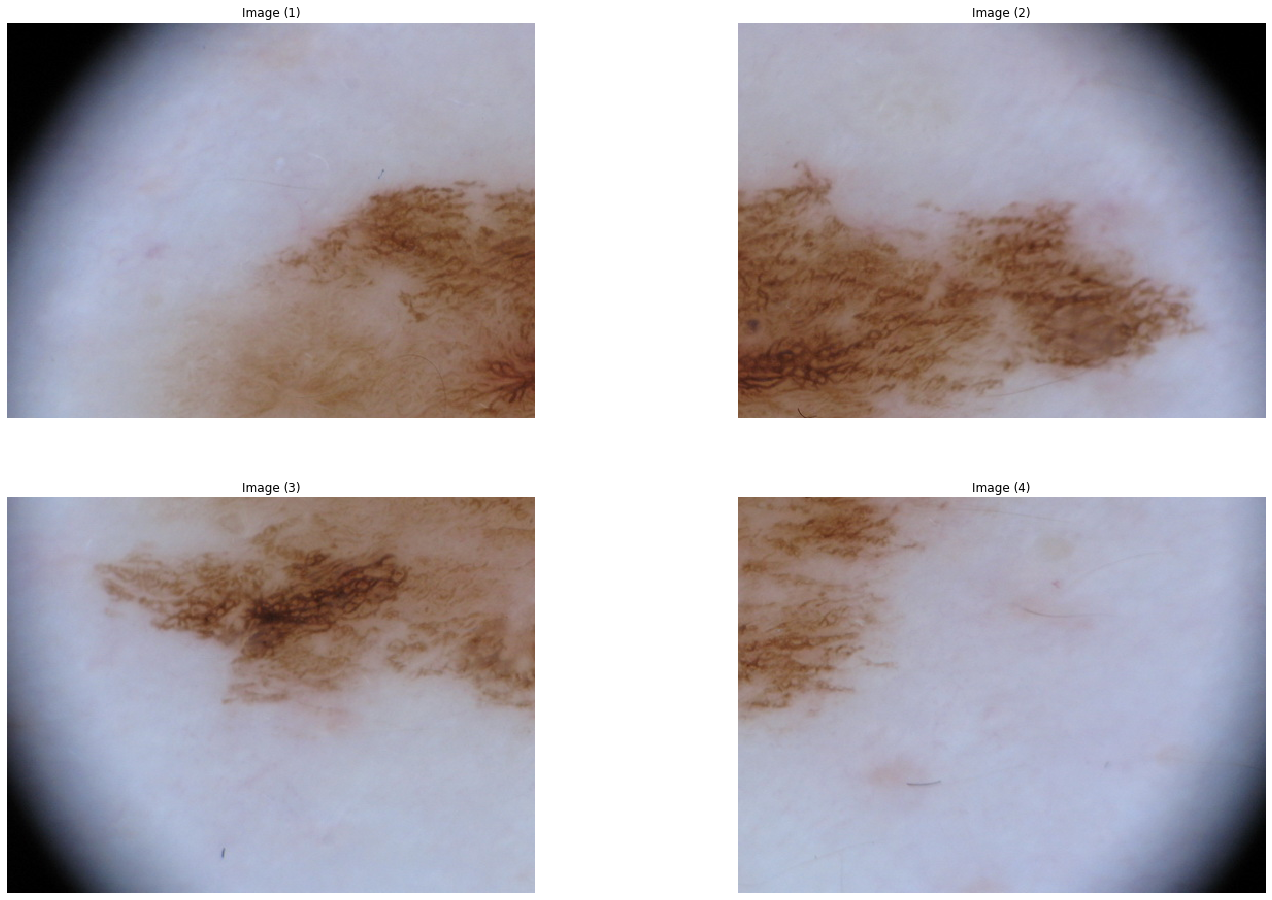

In [62]:
helpers.show_images(a[:-1], 2)

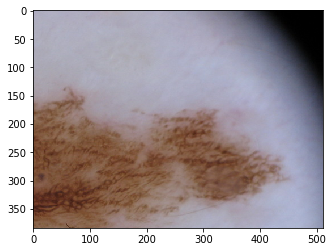

In [63]:
test = a[1]
plt.imshow(test)

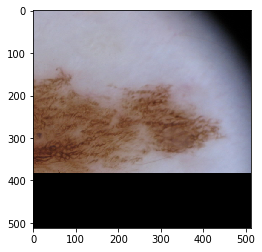

In [64]:
sq = pad_image_for_square(test)
plt.imshow(sq)